In [1]:
# import necessary libraries
import pandas as pd
import os
import sys
import warnings
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px
from plotnine import *
from mizani.formatters import percent_format
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("DA2_2023")[0]

# Load prewritten functions
func = dirname + "DA2_2023/work-files/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
# import Prices and Features CSVs
prices = pd.read_csv("hotels-europe_price.csv")
features = pd.read_csv("hotels-europe_features.csv")

In [5]:
# Merge tables using hotel_id
df = prices.merge(features, on ="hotel_id")

In [6]:
df_naples = df.loc[df['city']=="Naples"]

In [7]:
df_naples.T

,83947,83948,83949,83950,83951,83952,83953,83954,83955,83956,...,87711,87712,87713,87714,87715,87716,87717,87718,87719,87720
hotel_id,11706,11706,11706,11706,11707,11707,11707,11707,11707,11707,...,12213,12213,12213,12213,12213,12213,12214,12214,12214,12214
price,278,69,69,69,43,72,49,43,49,181,...,76,81,76,76,81,76,81,81,349,81
offer,0,0,0,0,1,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
offer_cat,0% no offer,0% no offer,0% no offer,0% no offer,15-50% offer,0% no offer,15-50% offer,15-50% offer,15-50% offer,15-50% offer,...,1-15% offer,1-15% offer,1-15% offer,1-15% offer,1-15% offer,1-15% offer,0% no offer,0% no offer,0% no offer,0% no offer
year,2017,2017,2017,2017,2018,2018,2018,2018,2017,2017,...,2018,2017,2018,2017,2017,2018,2017,2017,2017,2017
month,12,11,12,11,1,3,5,4,11,12,...,3,12,5,11,11,4,12,11,12,11
weekend,0,0,0,1,1,1,1,1,1,0,...,1,0,1,1,0,1,0,0,0,1
holiday,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
nnights,4,1,1,1,1,1,1,1,1,4,...,1,1,1,1,1,1,1,1,4,1
scarce_room,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1


In [8]:
df_naples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 83947 to 87720
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            3774 non-null   int64  
 1   price               3774 non-null   int64  
 2   offer               3774 non-null   int64  
 3   offer_cat           3774 non-null   object 
 4   year                3774 non-null   int64  
 5   month               3774 non-null   int64  
 6   weekend             3774 non-null   int64  
 7   holiday             3774 non-null   int64  
 8   nnights             3774 non-null   int64  
 9   scarce_room         3774 non-null   int64  
 10  city                3774 non-null   object 
 11  distance            3774 non-null   float64
 12  stars               1474 non-null   float64
 13  rating              3284 non-null   float64
 14  country             3774 non-null   object 
 15  city_actual         3774 non-null   object 
 16  r

In [9]:
# look at our df
df_naples.columns

Index(['hotel_id', 'price', 'offer', 'offer_cat', 'year', 'month', 'weekend',
       'holiday', 'nnights', 'scarce_room', 'city', 'distance', 'stars',
       'rating', 'country', 'city_actual', 'rating_reviewcount',
       'center1label', 'center2label', 'neighbourhood', 'ratingta',
       'ratingta_count', 'distance_alter', 'accommodation_type'],
      dtype='object')

In [10]:
# use hotel user ratings to create a binary variable: highly_rated=1 if rating ≥ 4, 0 otherwise
df_naples['highly_rated'] = [1 if r >= 4 else 0 for r in df_naples['rating']]

In [11]:
df_naples['highly_rated'].value_counts()

0    1954
1    1820
Name: highly_rated, dtype: int64

In [12]:
f'There are {df_naples["hotel_id"].nunique()} uniqe hotels in this table.'

'There are 509 uniqe hotels in this table.'

## Null values 
# We need to decide what to do with these

In [13]:
null_count = df_naples['rating'].isnull().sum()
print(f"Number of null values in the 'rating' column: {null_count}")

Number of null values in the 'rating' column: 490


Task 1. Examine how high rating is related to the other hotel features in the data
- price (ln?)
- distance
- stars
- rating-reviewcount?
- neighbourhood

    Which ones should we look at?


### Price Filtering

In [14]:
# Check for null values
df_naples['price'].isnull().sum()

0

<Axes: title={'center': 'Fig1: Price Distribution'}, xlabel='Price', ylabel='Number of Accomodations'>

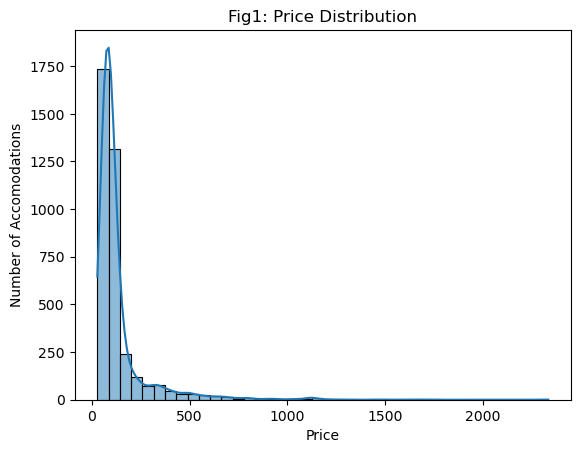

In [15]:
# Make a hist of the prices from the raw data
fig1 = sns.histplot(df_naples['price'],bins=40 ,kde=True)
fig1.set(title='Fig1: Price Distribution', xlabel='Price', ylabel='Number of Accomodations')
fig1

In [16]:
# Get an idea about outliers
df_naples['price'].describe(percentiles=[0.5,0.95])

count    3774.000000
mean      133.955750
std       151.861088
min        28.000000
50%        89.000000
95%       405.000000
max      2335.000000
Name: price, dtype: float64

In [17]:
# filter out outliers, which are probably errors or luxury hotels
filtered_naples = df_naples.loc[df_naples['price'] <= 450]

<Axes: title={'center': 'Fig2: Filtered Price Distribution'}, xlabel='Price', ylabel='Number of Accomodations'>

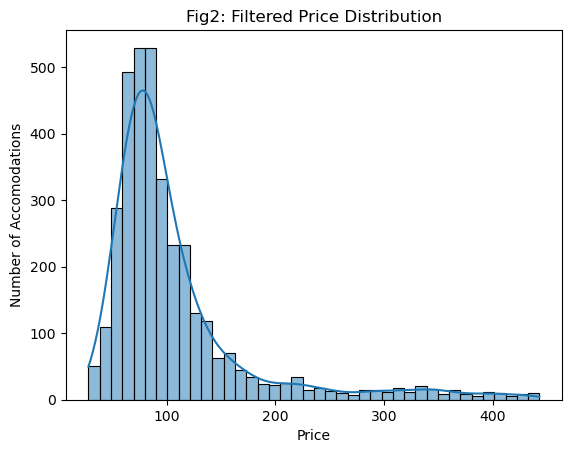

In [18]:
# Make a hist of the prices without outliers
fig2 = sns.histplot(filtered_naples['price'],bins=40 ,kde=True)
fig2.set(title='Fig2: Filtered Price Distribution', xlabel='Price', ylabel='Number of Accomodations')
fig2

In [19]:
# create log price
filtered_naples["lnp"] = np.log(filtered_naples["price"])

<Axes: title={'center': 'Fig3: Natural Logarithm of Price Distribution'}, xlabel='Ln Price', ylabel='Number of Accomodations'>

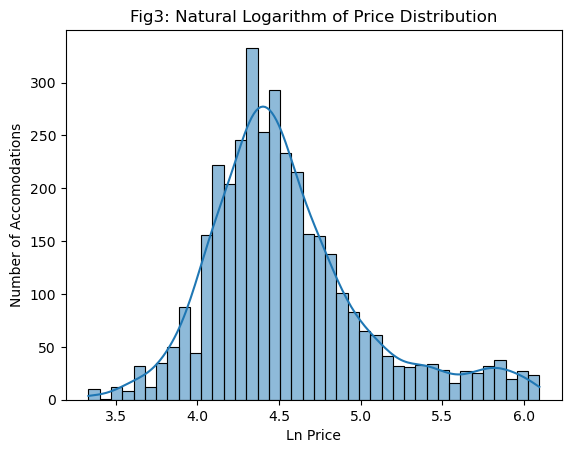

In [20]:
fig3 = sns.histplot(filtered_naples["lnp"],bins=40 ,kde=True)
fig3.set(title='Fig3: Natural Logarithm of Price Distribution', xlabel='Ln Price', ylabel='Number of Accomodations')
fig3

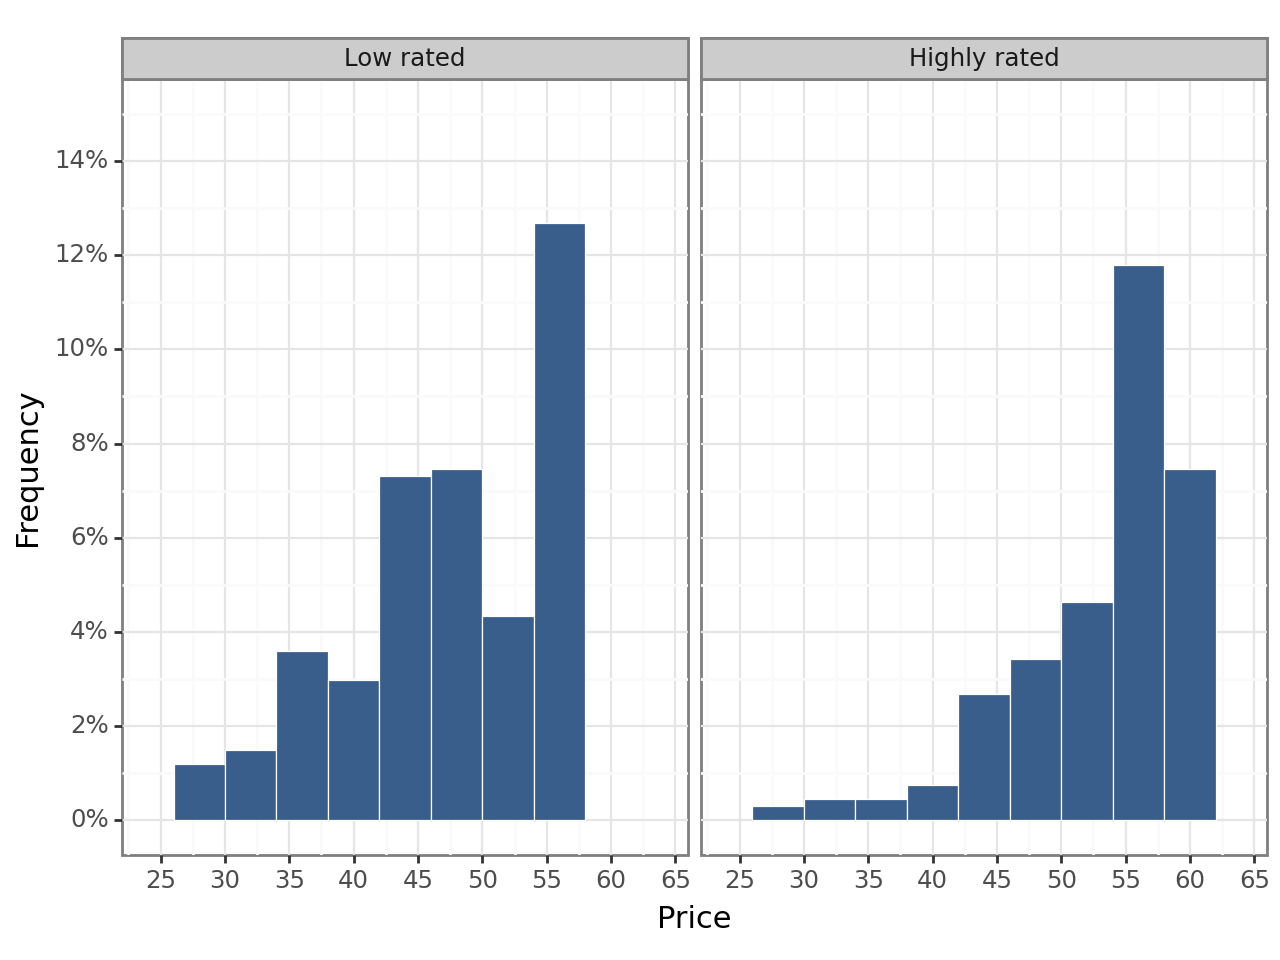

<Figure Size: (640 x 480)>

In [21]:
# Plot Price Distribution seperately for high and low rated
(
    ggplot(filtered_naples, aes(x="price", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=4,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
    )
    + facet_wrap("~highly_rated", labeller={"0": "Low rated", "1": "Highly rated"})
    + labs(x="Price", y="Frequency")
    + scale_x_continuous(
        limits=(24, 64),
        breaks=seq(25, 65, by=5),
    )
    + scale_y_continuous(
        limits=(0, 0.15), breaks=seq(0, 0.15, by=0.02), labels=percent_format()
    )
    + theme_bw()
)

## Distance filtering

In [22]:
# Check for null values
filtered_naples['distance'].isnull().sum()

0

<Axes: title={'center': 'Fig4: Distance Distribution'}, xlabel='Distance', ylabel='Number of Accomodations'>

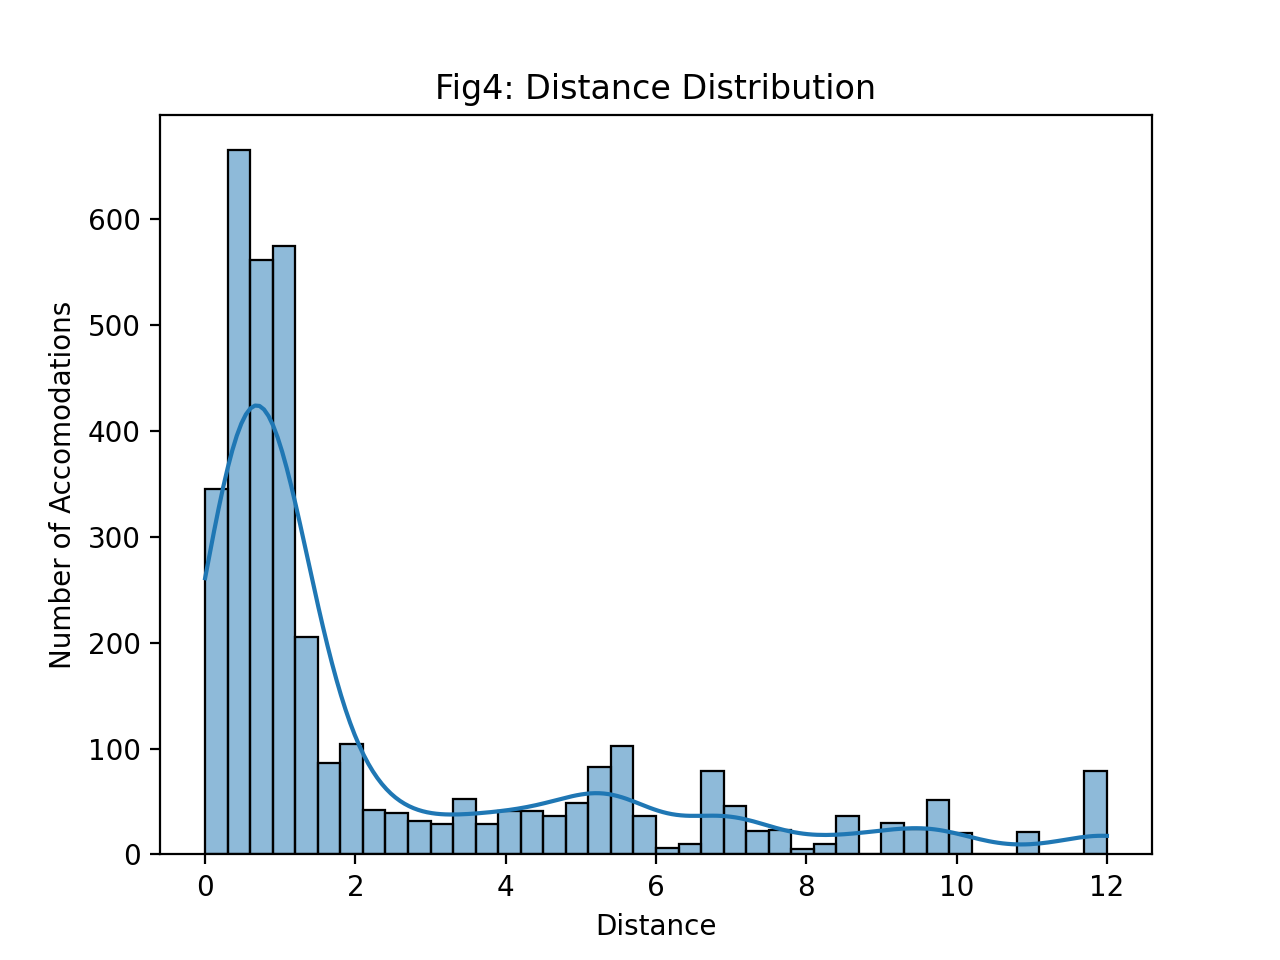

In [23]:
# Make a hist of the distance from the price filtered data
fig4 = sns.histplot(filtered_naples['distance'],bins=40 ,kde=True)
fig4.set(title='Fig4: Distance Distribution', xlabel='Distance', ylabel='Number of Accomodations')
fig4

In [24]:
# Get an idea about outliers
filtered_naples['distance'].describe(percentiles=[0.5,0.95])

count    3614.000000
mean        2.374571
std         2.943483
min         0.000000
50%         1.000000
95%         9.500000
max        12.000000
Name: distance, dtype: float64

In [25]:
# filter out outliers, which are probably errors (very far from city centre)
filtered_naples = df_naples.loc[df_naples['distance'] <= 9.5]

<Axes: title={'center': 'Fig5: Distance Distribution'}, xlabel='Distance', ylabel='Number of Accomodations'>

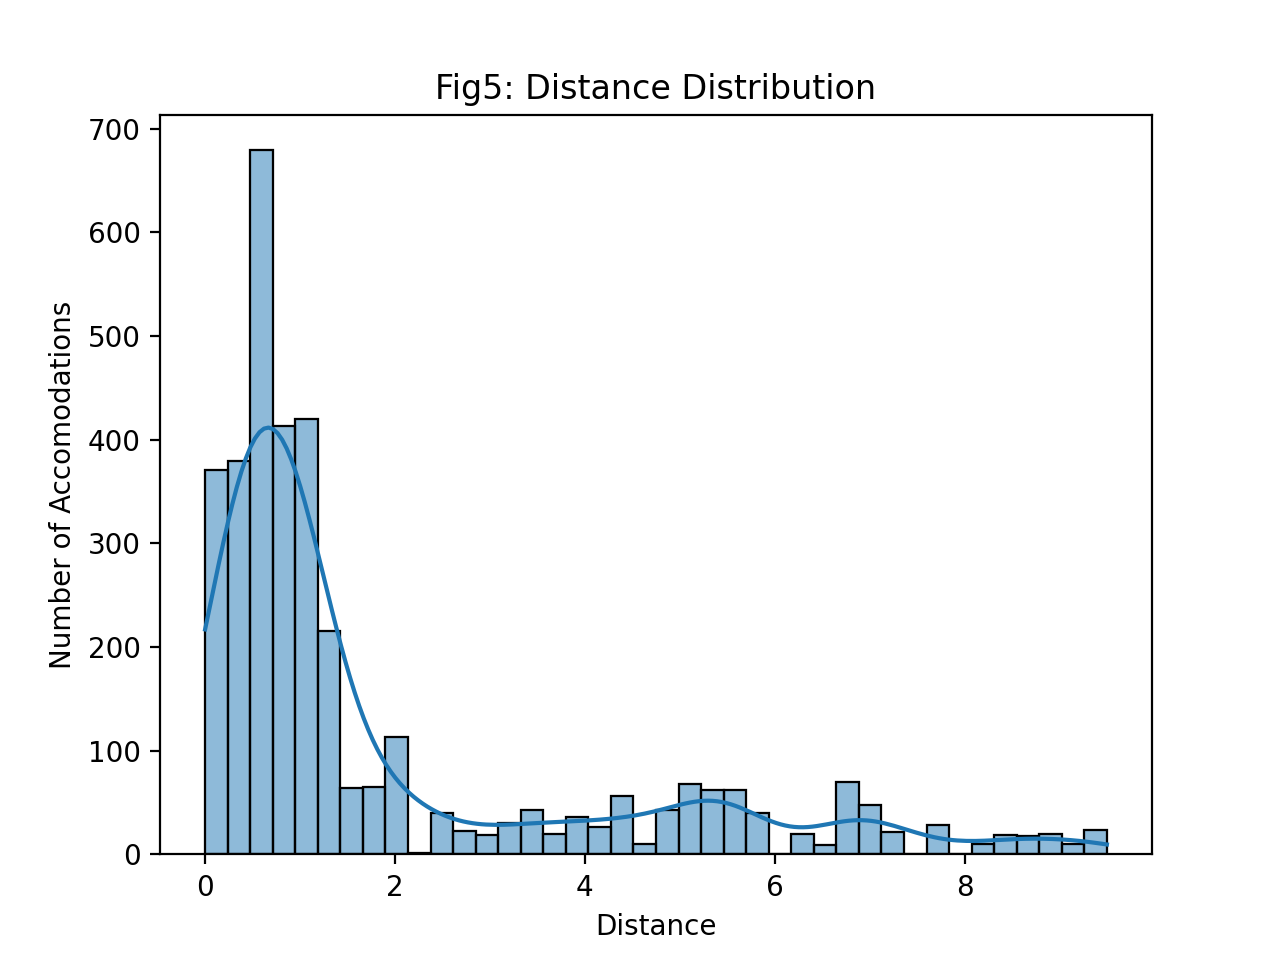

In [26]:
# Make a hist of the distance from the filtered data
fig5 = sns.histplot(filtered_naples['distance'],bins=40 ,kde=True)
fig5.set(title='Fig5: Distance Distribution', xlabel='Distance', ylabel='Number of Accomodations')
fig5

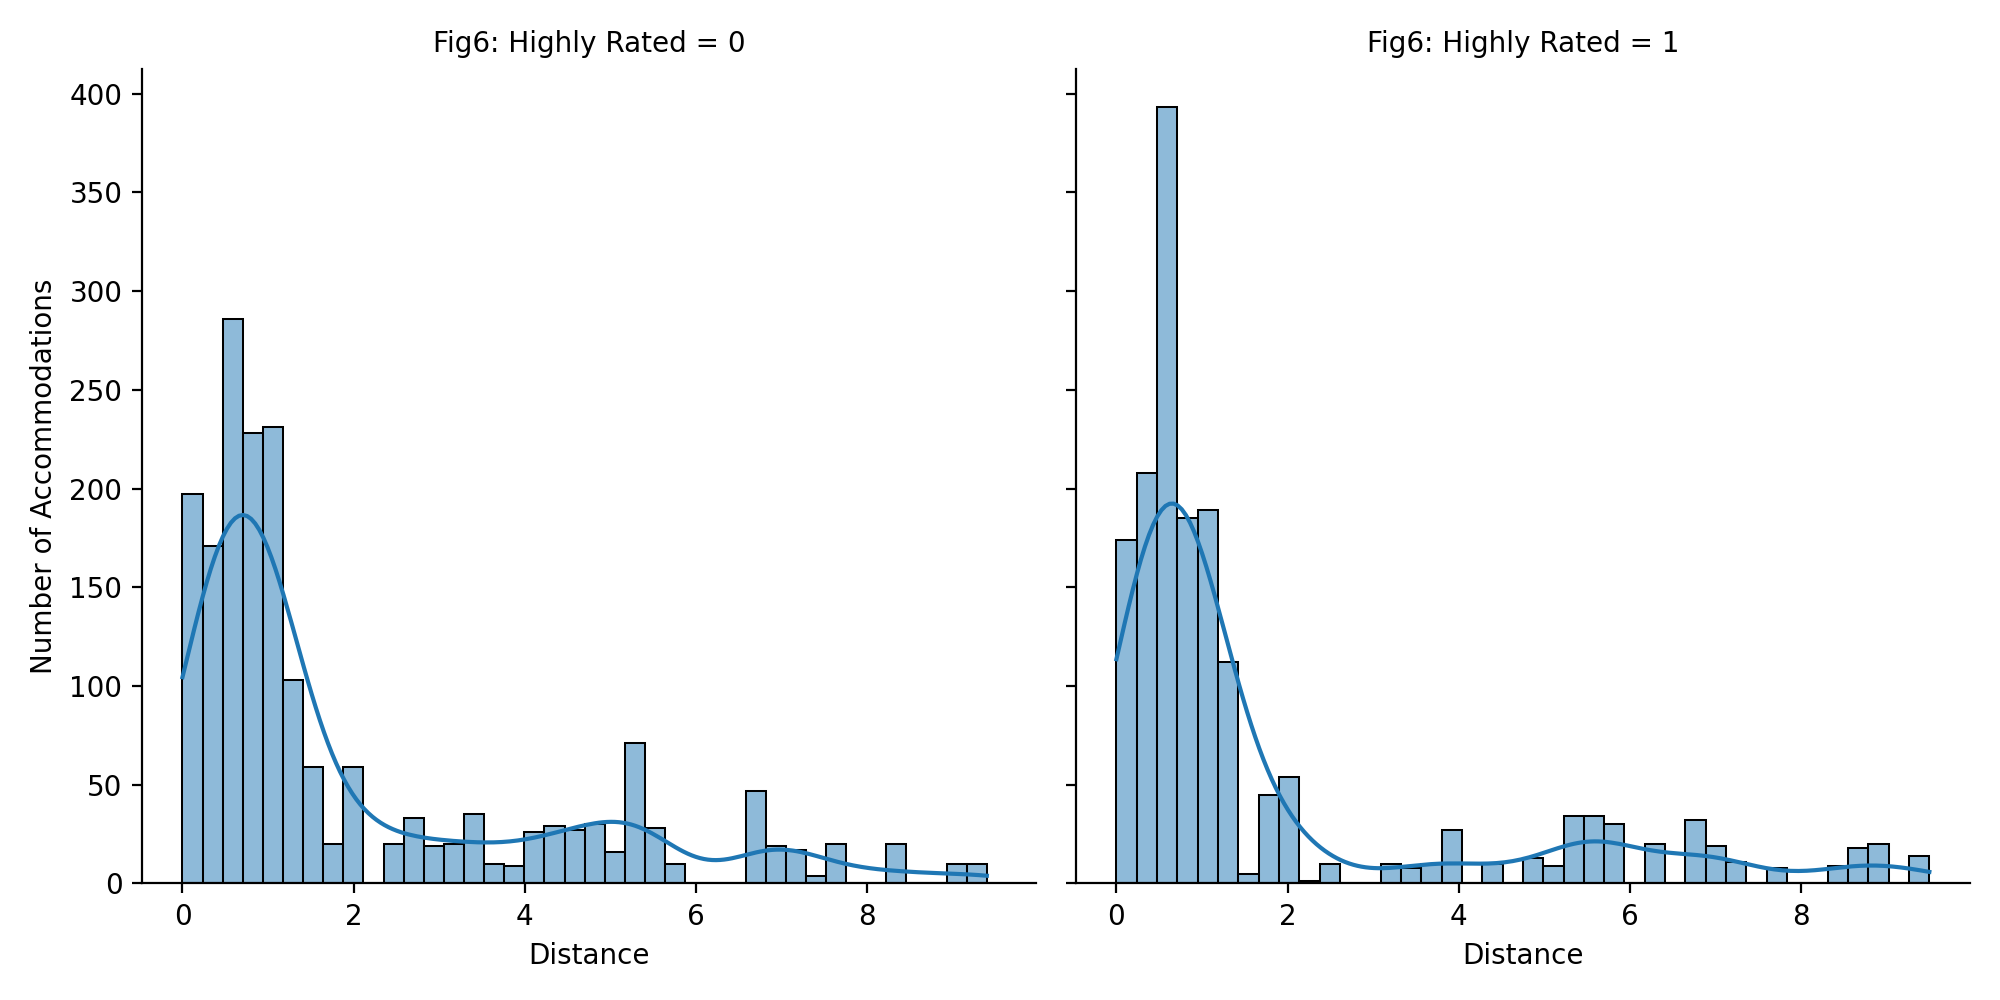

In [27]:
# Create a FacetGrid in sns
grid = sns.FacetGrid(filtered_naples, col='highly_rated', height=5)
grid.map(sns.histplot, 'distance', bins=40, kde=True)

grid.set_titles(col_template='Fig6: Highly Rated = {col_name}')
grid.set_axis_labels(x_var='Distance', y_var='Number of Accommodations')

plt.show()

## Stars filtering

In [28]:
# Check for null values
print(f'''There are {filtered_naples["stars"].shape[0]} values in the column out of which {filtered_naples["stars"].isnull().sum()} are null.      
We have {filtered_naples["stars"].count()} non-empty cells.''')

There are 3596 values in the column out of which 2229 are null.      
We have 1367 non-empty cells.


In [29]:
filtered_naples['stars'].value_counts().reset_index().sort_values(by='index')

,index,stars
2,1.0,57
3,2.0,47
1,3.0,604
5,3.5,13
0,4.0,617
4,5.0,29


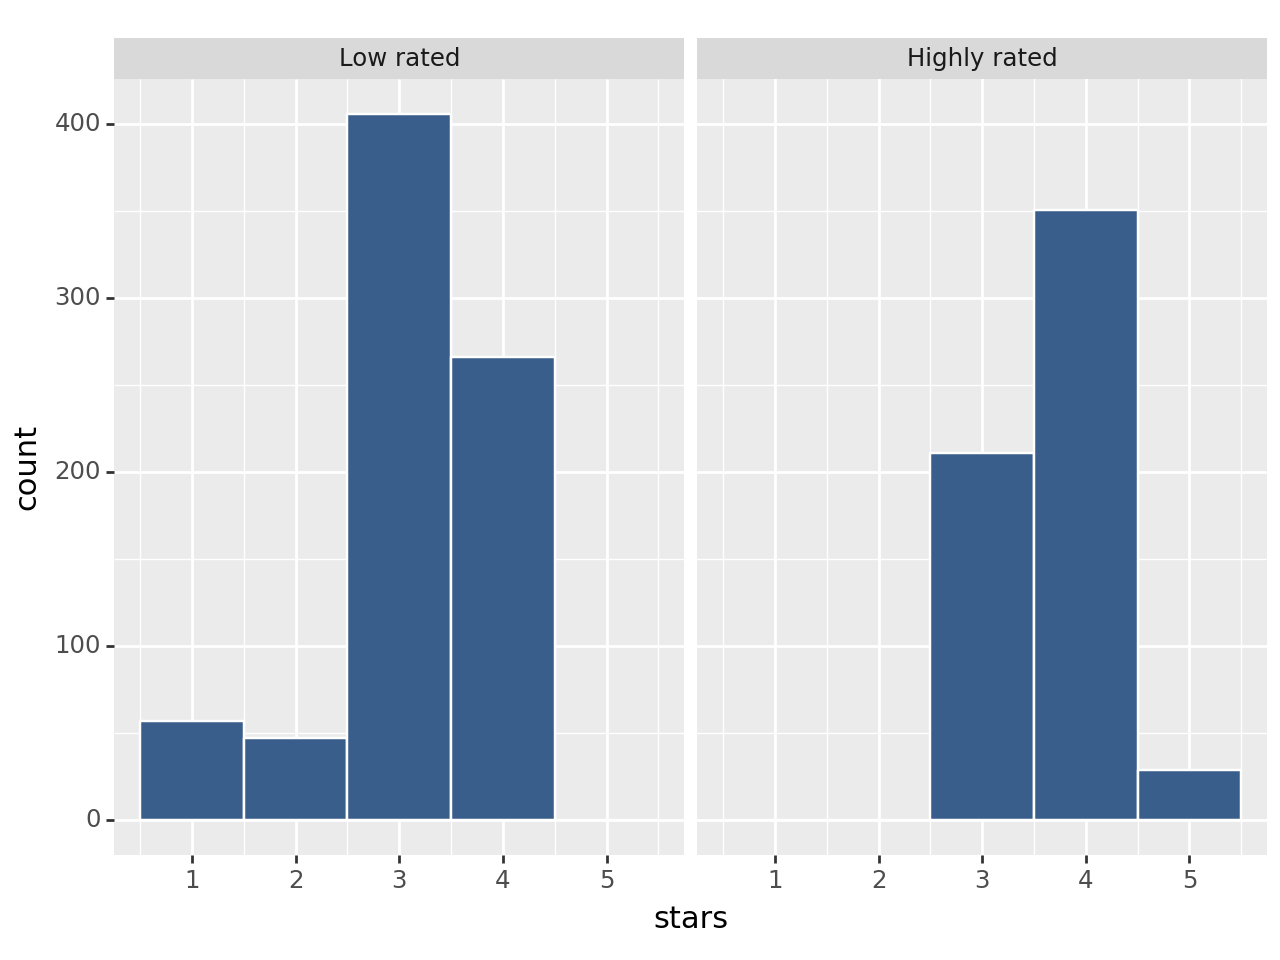

<Figure Size: (640 x 480)>

In [30]:
# Plot the distribution of stars
(ggplot(filtered_naples, aes(x="stars"))
 + geom_histogram(
     binwidth=1,
        color="white",
        fill=color[0])
+ facet_wrap("~highly_rated", labeller={"0": "Low rated", "1": "Highly rated"}))

In [31]:
# No need for filtering in this column

## Model 1

In [32]:
# Fit the regression model
reg1 = smf.ols(formula='price~highly_rated', data=filtered_naples).fit(cov_type="HC1")
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.79
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           0.000207
Time:                        11:00:28   Log-Likelihood:                -23088.
No. Observations:                3596   AIC:                         4.618e+04
Df Residuals:                    3594   BIC:                         4.619e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      125.8004      3.280     38.355      0.000     119.372     132.229
highly_rated    18.5156      4.986      3.714      0.000       8.744      28.287
==============================================================================
Omnibus:                     3584.779   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208053.493
Skew:                           4.858   Prob(JB):                         0.00
Kurtosis:                      38.975   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [33]:
# Fit the regression model
reg1 = smf.ols(formula='highly_rated~price', data=filtered_naples).fit(cov_type="HC1")
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           highly_rated   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     12.07
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           0.000519
Time:                        11:00:28   Log-Likelihood:                -2598.9
No. Observations:                3596   AIC:                             5202.
Df Residuals:                    3594   BIC:                             5214.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4481      0.012     38.926      0.000       0.425       0.471
price          0.0002   5.99e-05      3.474      0.001    9.07e-05       0.000
==============================================================================
Omnibus:                    12787.957   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.667
Skew:                           0.095   Prob(JB):                    9.02e-129
Kurtosis:                       1.025   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [34]:
# lowess for splines